<a href="https://colab.research.google.com/github/Aswin-Cheerngodan/AI-ML-books/blob/main/aapl_stock_price_model_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model development

Try different models like LSTM, GRU, Transformers

Importing dependencies

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input, GRU, BatchNormalization, Bidirectional
from sklearn.preprocessing import StandardScaler

In [197]:
stock = "apple"

In [198]:
df = pd.read_csv("/content/apple.csv")
scaler = StandardScaler()

data = df[[ 'Open', 'Close', 'High', 'Low', 'Volume', 'normalized']].values

split = int(0.95*len(data))
train_data = data[:split]
test_data = data[split:]

train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

train_data.shape,test_data.shape

((1471, 6), (78, 6))

In [199]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data)-window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, 0])

    return np.array(X), np.array(y)

window_size = 10
X_train, y_train = create_sequences(train_data, window_size)
X_test, y_test = create_sequences(test_data, window_size)

X_train.shape, y_train.shape

((1461, 10, 6), (1461,))

In [200]:
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=1024, return_sequences=True),
    Dropout(0.1),
    Bidirectional(LSTM(units=512, return_sequences=True)),
    Dropout(0.1),
    LSTM(units=256, return_sequences=True),
    Dropout(0.1),
    Bidirectional(LSTM(units=128, return_sequences=False)),
    Dense(units=256, activation='relu'),
    Dense(units=128, activation='tanh'),
    Dense(units=64, activation='relu'),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [201]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_52 (LSTM)                       │ (None, 10, 1024)            │       4,222,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 10, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_26 (Bidirectional)     │ (None, 10, 1024)            │       6,295,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 10, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_54 (LSTM)                       │ (None, 10, 256)             │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 10, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_27 (Bidirectional)     │ (None, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,331,521 (47.04 MB)

 Trainable params: 12,331,521 (47.04 MB)

 Non-trainable params: 0 (0.00 B)

In [202]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=16,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - loss: 0.1352 - val_loss: 0.2665
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0141 - val_loss: 0.0808
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0342 - val_loss: 0.0721
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0102 - val_loss: 0.0658
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0087 - val_loss: 0.1410
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0074 - val_loss: 0.0866
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0118 - val_loss: 0.0153
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0065 - val_loss: 0.0162
Epoch 9/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0088 - val_loss: 0.0826
Epoch 10/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0098 - val_loss: 0.0192
Epoch 11/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0050 - val_loss: 0.0076
Epoch 12/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.

In [203]:
predicted_prices = model.predict(X_train)

def inverse_transform(scaled_data, scaler):
    dummy = np.zeros((len(scaled_data), 6))
    dummy[:, 0] = scaled_data.flatten()
    return scaler.inverse_transform(dummy)[:, 0]

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


In [204]:
actual_prices = inverse_transform(y_train, scaler)
predicted_prices = inverse_transform(predicted_prices, scaler)

actual_prices.shape, predicted_prices.shape

((1461,), (1461,))

In [205]:
test_data.shape

(78, 6)

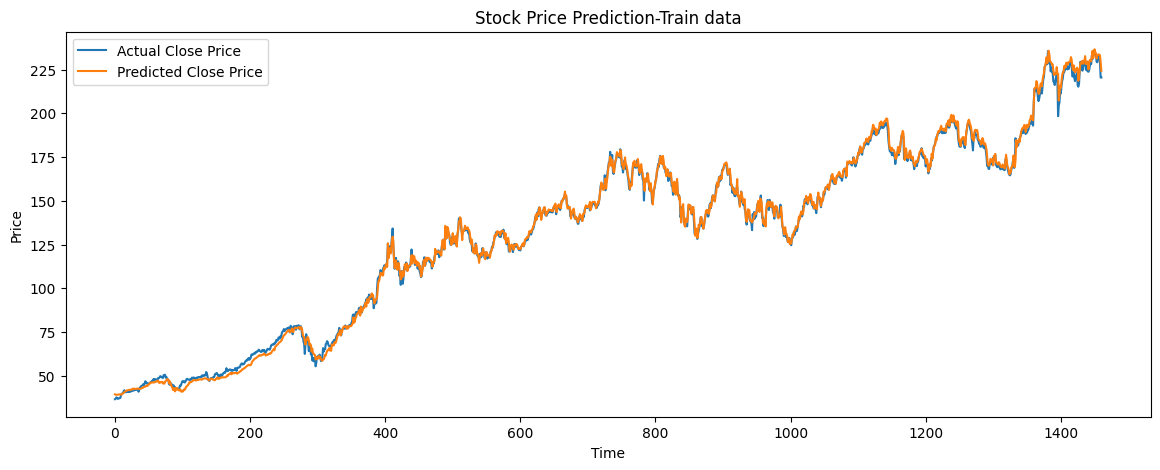

In [206]:
plt.figure(figsize=(14,5))
plt.plot(actual_prices, label='Actual Close Price')
plt.plot(predicted_prices, label='Predicted Close Price')
plt.title('Stock Price Prediction-Train data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


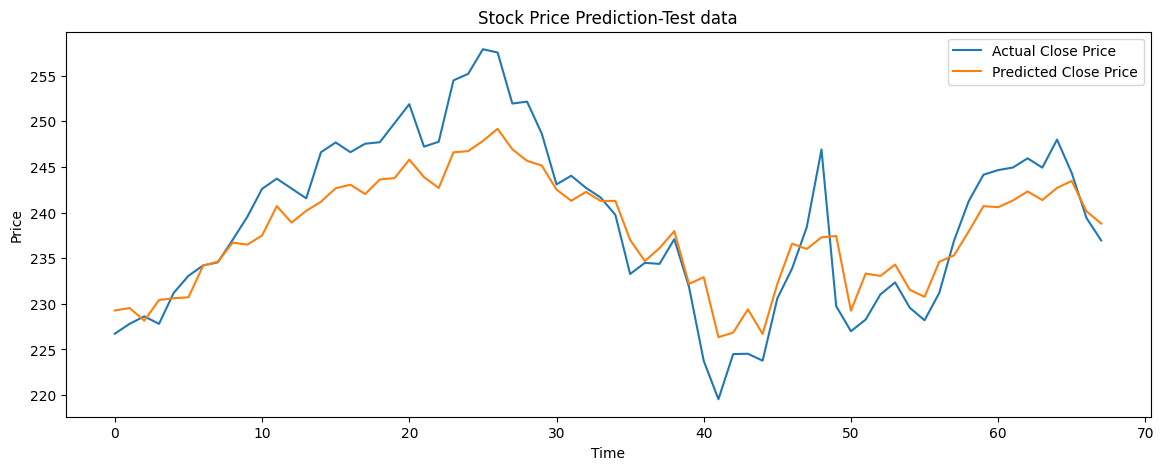

In [207]:
predicted_prices = model.predict(X_test)

actual_prices = inverse_transform(y_test, scaler)
predicted_prices = inverse_transform(predicted_prices, scaler)

plt.figure(figsize=(14,5))
plt.plot(actual_prices, label='Actual Close Price')
plt.plot(predicted_prices, label='Predicted Close Price')
plt.title('Stock Price Prediction-Test data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [208]:
from sklearn.metrics import mean_absolute_percentage_error

mse = mean_absolute_percentage_error(actual_prices, predicted_prices)
print(mse)

0.014303441519998397


In [209]:
import joblib

joblib.dump(scaler, f"{stock}_scaler.pkl")

model.save(f"{stock}_model.keras")

### Insights

The predicted price is not close to the original price and pattern looks more smooth does't learned the complex pattern.